<p style="font-size:14px; text-align: right">CoastWatch Python Exercises</p>  

# Python Basics: A tutorial for the NOAA Satellite Workshop
> history | updated August 2021  
> owner | NOAA CoastWatch

## In this exercise, you will use Python to download data and metadata from ERDDAP.

### The exercise demonstrates the following skills: 

* Using Python to retrieve information about a dataset from ERDDAP
* Downloading satellite data from ERDDAP in netCDF format
* Extracting data with Python

### About the dataset used in this exercise
* For the examples in this exercise we will use the NOAA GeoPolar Sea Surface Temperature  dataset from the CoastWatch West Coast Node 
* ERDDAP ID = nesdisGeoPolarSSTN5SQNRT
* https://coastwatch.pfeg.noaa.gov/erddap/griddap/nesdisGeoPolarSSTN5SQNRT.graph  
* The dataset contains monthly composites of SST
* The low spatial resolution (0.05 degrees) will allow for small download size and help prevent overloading the internet bandwidth during the class  

 

### Look for python modules you might not have installed
* Use the pkg_resources module to check for installed modules
* We will be using the xarray, numpy, and pandas modules for this exercise. 
* Make sure that they are installed in your Python 3 environment. 
* A quick way to do this is with the script below

In [26]:
import pkg_resources

# Create a set 'curly brackets' of the modules to look for
# You can put any modules that you want to in the set
required = {'xarray', 'numpy', 'pandas'}

# look for the installed packages
installed = {pkg.key for pkg in pkg_resources.working_set}

# Find which modules are missing
missing = required - installed
if len(missing)==0:
    print('All modules are installed')
else:
    print('These modules are missing', ', '.join(missing))

All modules are installed


## Import the primary modules for this tutorial
* numpy is used for matrix operations
* numpy.ma specifically is used for masked arrays
* pandas is used for tabular data
* xarray is used for opening the gridded dataset

In [27]:
import numpy as np  
import numpy.ma as ma  
import pandas as pd  
import xarray as xr  

## Get information about a dataset from ERDDAP

We will use the xarray `open_dataset` function to access data and metadata from ERDDAP. Here we describe how to create the url for the `open_dataset` function and demonstrate a function to generate the ERDDAP url.

### Open a pointer to an ERDDAP dataset, using the xarray `open_dataset` function 
> xr.open_dataset('full_url_to_erddap_dataset')  

Where, the `full_url_to_erddap_dataset` is the base url to the ERDDAP you are using and the ERDDAP dataset id. So, for our dataset:    
* base_URL = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap'
* dataset_id = 'nesdisGeoPolarSSTN5SQNRT'
* full_URL = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap/nesdisGeoPolarSSTN5SQNRT'

__A simple `open_dataset` example__   
```python
base_URL = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap'
dataset_id = 'nesdisGeoPolarSSTN5SQNRT'
full_URL = '/'.join([base_URL, dataset_id])
print(full_URL)
da = xr.open_dataset(full_URL)
```

__Make this more versatile by putting it into a function__

```python
def point_to_dataset(dataset_id, base_url='https://coastwatch.pfeg.noaa.gov/erddap/griddap'):
    base_url = base_url.rstrip('/')
    full_url = '/'.join([base_url, dataset_id])
    return xr.open_dataset(full_url)
```  
* __dataset_id__ is the ERDDAP id for the dataset of interest. For this example: 'nesdisGeoPolarSSTN5SQNRT'
* __base_url__ is the url of the ERDDAP you are pulling data from. For this example, the West Coast Node ERDDAP at 'https://coastwatch.pfeg.noaa.gov/erddap/griddap'
* __full_url__ is the full URL to the ERDDAP dataset created by joining base_url and dataset_id
* The pointer to the dataset is returned
* The default base_url is the West Coast Node ERDDAP 'https://coastwatch.pfeg.noaa.gov/erddap/griddap'. 
* Examples of passing dataset_id and base_url to the function:
```python
point_to_dataset('nesdisGeoPolarSSTN5SQNRT')
```
```python
point_to_dataset(dataset_id = 'nesdisGeoPolarSSTN5SQNRT')
```
```python
point_to_dataset('nesdisGeoPolarSSTN5SQNRT', 'https://upwell.pfeg.noaa.gov/erddap/griddap')
```
```python
point_to_dataset(dataset_id = 'nesdisGeoPolarSSTN5SQNRT', 
                 base_url = 'https://upwell.pfeg.noaa.gov/erddap/griddap')
```

In [28]:
def point_to_dataset(dataset_id, base_url='https://coastwatch.pfeg.noaa.gov/erddap/griddap'):
    base_url = base_url.rstrip('/')
    full_url = '/'.join([base_url, dataset_id])
    return xr.open_dataset(full_url)

da = point_to_dataset('nesdisGeoPolarSSTN5SQNRT')
da

<xarray.Dataset>
Dimensions:           (latitude: 3600, longitude: 7200, time: 6914)
Coordinates:
  * time              (time) object 2002-09-01 12:00:00 ... 2021-08-12 12:00:00
  * latitude          (latitude) float32 -89.97 -89.93 -89.88 ... 89.93 89.97
  * longitude         (longitude) float32 -180.0 -179.9 -179.9 ... 179.9 180.0
Data variables:
    analysed_sst      (time, latitude, longitude) float32 ...
    analysis_error    (time, latitude, longitude) float32 ...
    sea_ice_fraction  (time, latitude, longitude) float32 ...
    mask              (time, latitude, longitude) float32 ...
Attributes: (12/50)
    acknowledgement:            NOAA/NESDIS
    cdm_data_type:              Grid
    comment:                    The Geo-Polar Blended Sea Surface Temperature...
    Conventions:                CF-1.6, Unidata Observation Dataset v1.0, COA...
    creator_email:              john.sapper@noaa.gov
    creator_name:               Office of Satellite Products and Operations
    ...                         ...
    summary:                    This dataset is an aggregation of Science Qua...
    testOutOfDate:              now-17days
    time_coverage_end:          2021-08-12T12:00:00Z
    time_coverage_start:        2002-09-01T12:00:00Z
    title:                      SST, NOAA Geo-Polar Blended Global Level 4, S...
    Westernmost_Easting:        -179.975

## Examine the metadata
### Examine the coordinate variables and dimensions
* The code below lists the coordinate variables and their sizes.   
* The dataset is a 3D array with:
    * 6793 values in the time dimension (as of 4/15/2021 but that increases each day)  
    * 3600 values in the latitude dimension
    * 7200 values in the longitude dimension


In [29]:
display(da.coords)
display(da.dims)

Coordinates:
  * time       (time) object 2002-09-01 12:00:00 ... 2021-08-12 12:00:00
  * latitude   (latitude) float32 -89.97 -89.93 -89.88 ... 89.88 89.93 89.97
  * longitude  (longitude) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0

Frozen(SortedKeysDict({'time': 6914, 'latitude': 3600, 'longitude': 7200}))

### Examine the data variables
* The code below lists the data variables. 
* There are several variables in the dataset. We are interested in "analysed_sst".

In [30]:
print ('data variables', list(da.keys()))

data variables ['analysed_sst', 'analysis_error', 'sea_ice_fraction', 'mask']


### Examine the Global Attributes
Global attributes provide information about a dataset as a whole. A few of the global attributes are important for helping you to decide if the dataset will work for your application:  

* `geospatial_lat_min`, `geospatial_lat_max`, `geospatial_lon_min` and `geospatial_lon_max` provide the geographical range of the dataset  


* `time_coverage_start` and `time_coverage_end` provide the time range covered by the dataset 


* `geospatial_lat_resolution` and `geospatial_lon_resolution` povide the spatial resolution


* Attributes like `comment`, `summary`, and `references` provide more information about:
    * how the dataset was generated
    * how you may use the data
    * the people and organizations to acknowledge if you use the data

The code below lists these global attributes.


In [31]:
print('Latitude range:', da.geospatial_lat_min, 'to', da.geospatial_lat_max)
print('Longitude range:', da.geospatial_lon_min, 'to', da.geospatial_lon_max)
print('Time range:', da.time_coverage_start, 'to', da.time_coverage_end)
print('Spatial resolution (degrees):', 
      'lat', np.around(da.geospatial_lat_resolution, decimals=3), 
      'lon', np.around(da.geospatial_lon_resolution, decimals=3) 
     )

print(' ')
print('Dataset summary:')
print(da.summary)

Latitude range: -89.975 to 89.975
Longitude range: -179.975 to 179.975
Time range: 2002-09-01T12:00:00Z to 2021-08-12T12:00:00Z
Spatial resolution (degrees): lat 0.05 lon 0.05
 
Dataset summary:
This dataset is an aggregation of Science Quality STAR data (2002-2016) and Near Real Time OSPO data (2017-present). Analysed blended sea surface temperature over the global ocean using night only input data. An SST estimation scheme which combines multi-satellite retrievals of sea surface temperature datasets available from polar orbiters, geostationary InfraRed (IR) and microwave sensors into a single global analysis. This global SST ananlysis provide a daily gap free map of the foundation sea surface temperature at 0.05� spatial resolution.


# Download data from ERDDAP

For this exercise, the area we are interested in includes Monterey Bay, CA:  
* Latitude range: 32N, 39N
* Longitude range: -124E, -117E
* Time range June 3, 2020 to June 7, 2020 

The Xarray module makes it really easy to request a subset of a dataset using latitude, longitude, and time ranges. Here is an example using the `sel` method with the `slice` function.  
```python
sst = da['analysed_sst'].sel(  
                  latitude=slice(32., 39.),  
                  longitude=slice(-124, -117),  
                  time=slice('2020-06-03T12:00:00', '2020-06-07T12:00:00')  
                 )  
```

>Note: If the dataset has an altitude dimension, an altitude slice would need to be added, e.g.  
>```python 
                  altitude=slice(0.0), 
>```

### Create a subsetting function
* Use these xarray features in a function to make it more versatile.  
* `my_da` is the data array produced from `open_dataset`
* `my_var` is the name of the variable
* the other inputs are the geographic and time ranges

In [32]:
def get_data(my_da, my_var,
             my_lt_min, my_lt_max, 
             my_ln_min, my_ln_max, 
             my_tm_min, my_tm_max
            ):
    
    my_data = my_da[my_var].sel(
                                latitude=slice(my_lt_min, my_lt_max), 
                                longitude=slice(my_ln_min, my_ln_max), 
                                time=slice(my_tm_min, my_tm_max)
                               )
    return my_data

### Run the subsetting function with our geographical and time ranges
The returned sst data array is a subset of `da`

In [33]:
lat_min  = 32.
lat_max = 39.
lon_min = -124.
lon_max = -117.
time_min = '2020-06-03T12:00:00'  # written in ISO format
time_max = '2020-06-07T12:00:00'  # written in ISO format
my_var = 'analysed_sst'

sst = get_data(
               da, my_var,
               lat_min, lat_max,
               lon_min, lon_max,
               time_min, time_max
              )


print(sst.dims)
print('Dimension size:', sst.shape)
sst

('time', 'latitude', 'longitude')
Dimension size: (5, 140, 140)


<xarray.DataArray 'analysed_sst' (time: 5, latitude: 140, longitude: 140)>
array([[[16.879993, 16.889994, ..., 18.779993, 18.679995],
        [16.819994, 16.829994, ..., 18.809994, 18.729994],
        ...,
        [11.529994, 11.449994, ...,       nan,       nan],
        [11.449994, 11.419994, ...,       nan,       nan]],

       [[16.929995, 16.969994, ..., 18.679995, 18.589994],
        [16.899994, 16.949993, ..., 18.729994, 18.649994],
        ...,
        [11.319994, 11.179994, ...,       nan,       nan],
        [11.229994, 11.139994, ...,       nan,       nan]],

       ...,

       [[16.979994, 16.979994, ..., 18.559994, 18.519995],
        [16.979994, 16.989994, ..., 18.589994, 18.559994],
        ...,
        [10.599994, 10.519994, ...,       nan,       nan],
        [10.459994, 10.389994, ...,       nan,       nan]],

       [[17.059994, 17.059994, ..., 18.539993, 18.439995],
        [17.069994, 17.059994, ..., 18.589994, 18.509995],
        ...,
        [11.369994, 11.189994, ...,       nan,       nan],
        [11.109994, 10.949994, ...,       nan,       nan]]], dtype=float32)
Coordinates:
  * time       (time) object 2020-06-03 12:00:00 ... 2020-06-07 12:00:00
  * latitude   (latitude) float32 32.03 32.08 32.12 32.17 ... 38.88 38.92 38.97
  * longitude  (longitude) float32 -124.0 -123.9 -123.9 ... -117.1 -117.1 -117.0
Attributes:
    colorBarMaximum:  32.0
    colorBarMinimum:  0.0
    comment:          nighttime analysed SST for each ocean grid point
    ioos_category:    Temperature
    long_name:        analysed sea surface temperature
    references:       Fieguth,P.W. et al. "Mapping Mediterranean altimeter da...
    source:           OSPO-ACSPO_VIIRS, OSPO-ACSPO_METOPB_FRAC, OSPO-GOES16_S...
    standard_name:    sea_surface_foundation_temperature
    units:            degree_C
    valid_max:        39.999992
    valid_min:        -2.0000062

## Visualizing the satellite SST data

### Make a simple plot
Xarray makes it easy to quickly visualize the data as a map.  
* Use the isel method to pick a time slice by its index number 
* Use the imshow method to plot the data
* We have 5 time steps so the index numbers are 0 to 4.  

Plot the first time step:  
```
sst.isel(time=0).plot.imshow()
```

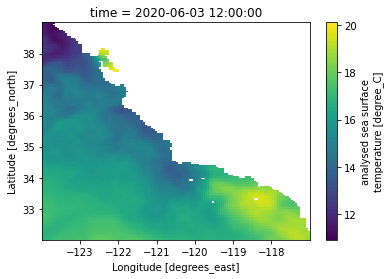

In [34]:
%matplotlib inline
sst.isel(time=0).plot.imshow()

### Use a loop to plot all 5 time steps

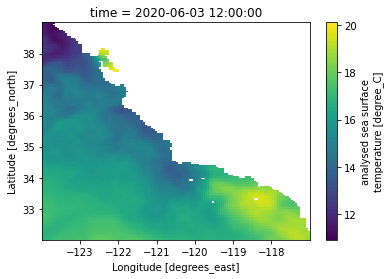

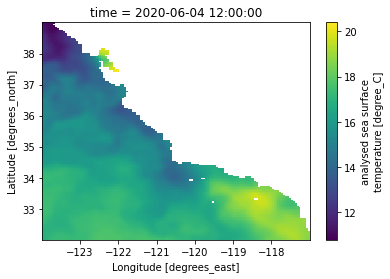

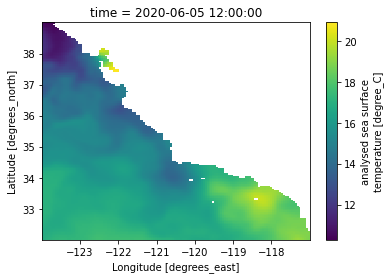

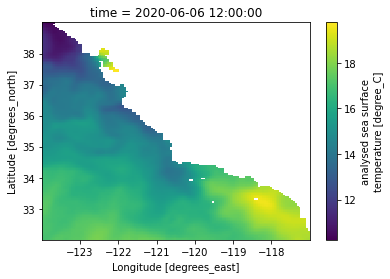

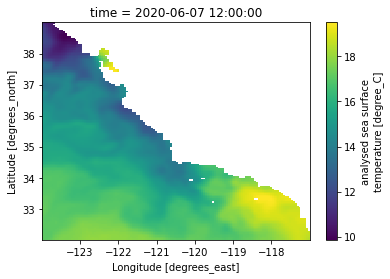

In [35]:
import matplotlib.pyplot as plt

for i in range(0,5):
    ax = plt.subplot()
    sst.isel(time=i).plot.imshow()
    plt.show()

## Calculate the mean SST over the region for each day 
* Use the `numpy mean()` method to take the mean of the latitude longitude grid ( axis=(1,2) ) for each time slice.
* Use the `matplotlib.pyplot.plot_date()` plot routine, which formats the x axis labels as dates
* Use `sst.time` as the x axis values and the mean as the Y axis values


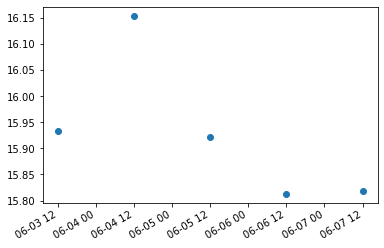

In [36]:
plt.plot_date(sst.time, sst.mean(axis=(1,2)), 'o')

# auto format the date label positions on the x axis
plt.gcf().autofmt_xdate()

# Appendix

### Installation instructions for the modules used in this tutorial:
pandas: https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html   
numpy: https://numpy.org/install/  
xarray: http://xarray.pydata.org/en/latest/getting-started-guide/installing.html 